# Chapter 3: Regression

# You learn
* How to simulate a curve
* How a to fit a linear regression model 
* How to predict a quantitative variable
* How to to classification using linear regression
* How to predict the class for a new observation 





# Linear Regression
Linear regression the expected value of $y$ is assumed to be a linear combination of the input variables $x_j$. In mathematical notion, if $\hat{y}$ is the predicted value.
$\hat{y}(\boldsymbol \beta, \mathbf x) = \beta_0 + \beta_1 x_1 + ... + \beta_p x_p$
The vector $\boldsymbol \beta$ is the regression coefficients (or learning rates) and $\beta_0$ is the `intercept`.
Later we perform classification using this model. Logistic regression, linear discriminant, linear support vector machines are closely related concepts.


# Simulating a cuve
We need to start with a defining a curve and add some noise about this curve. Use the exponential function for instance $y=e^{3x}$.


In [1]:
x_tr <- seq(0, 2, length=200)
y_tr <- exp(3*x_tr)

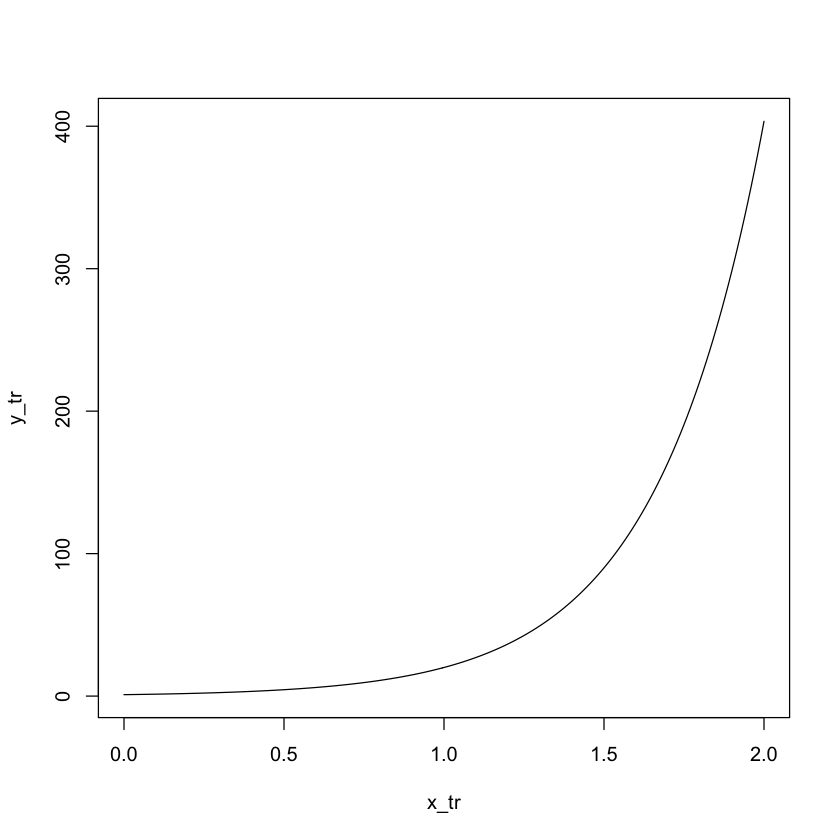

In [2]:
plot(x_tr, y_tr, type="l")

In [3]:
set.seed(10)
y <- y_tr+rnorm(length(x_tr), mean=0, sd=25)

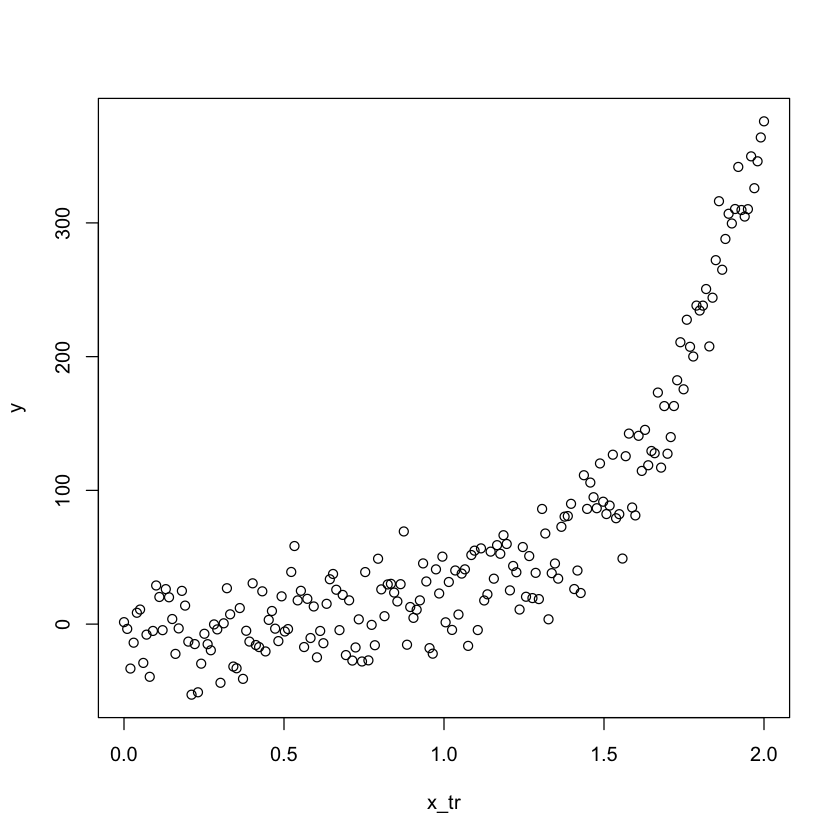

In [4]:
plot(x_tr,y)

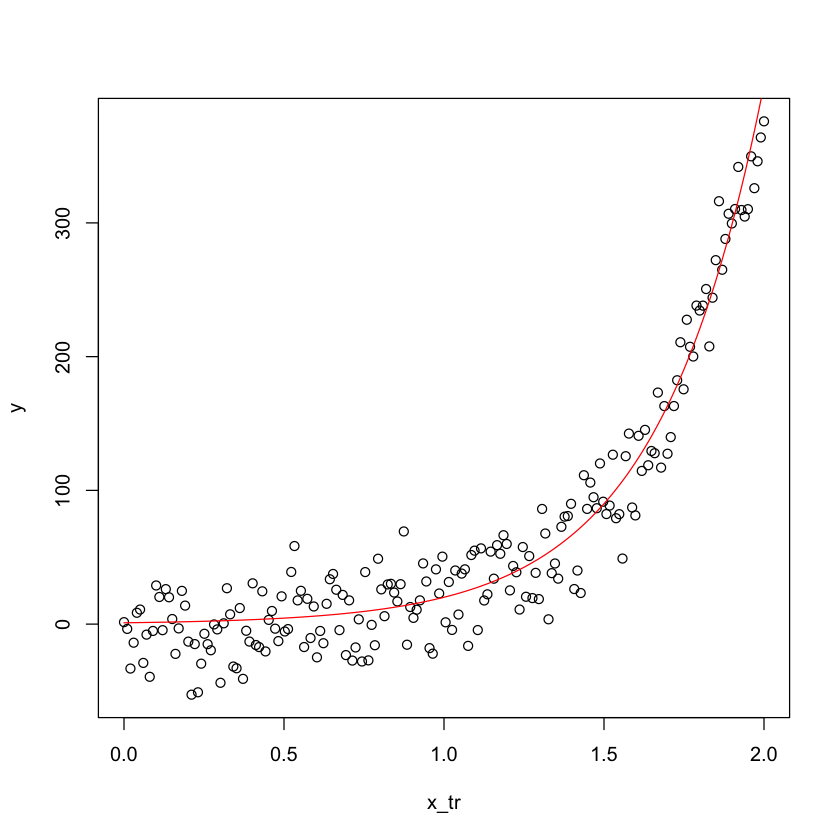

In [5]:
#xy_data<-as.data.frame(x_tr,y)
plot(x_tr,y)
points(x_tr, y_tr, type="l", col="red")

# Linear approximation
Now let's fit a line, this is a wrong model, but can be regarded as an approximation. Remember to fit the models while your  data are put in a single dataframe. 

In [6]:
regdata <- as.data.frame(cbind(y_tr, x_tr))
colnames(regdata) <- c("y","x")
regdata

lr.fit <- lm(y~x, data=regdata)
yhat <- predict(lr.fit)

y                  x
1                  1                  0
2   1.03060989056814 0.0100502512562814
3   1.06215674653687 0.0201005025125628
4   1.09466924831457 0.0301507537688442
5   1.12817695421378 0.0402010050251256
6   1.16271032732376  0.050251256281407
7   1.19830076320558 0.0603015075376884
8   1.23498061843502 0.0703517587939698
9   1.27278324001908 0.0804020100502513
10  1.31174299571302 0.0904522613065327
11  1.35189530526532  0.100502512562814
12  1.39327667261907  0.110552763819095
13  1.43592471909907  0.120603015075377
14  1.47987821761478  0.130653266331658
15  1.52517712791014   0.14070351758794
16  1.57186263289249  0.150753768844221
17  1.61997717607347  0.160804020100503
18  1.66956450015596  0.170854271356784
19  1.72066968680218  0.180904522613065
20   1.7733391976191  0.190954773869347
21  1.82762091639841  0.201005025125628
22   1.8835641926494   0.21105527638191
23  1.94121988646446  0.221105527638191
24  2.00064041475783  0.231155778894472
25  2.06187979891975  0.241206030150754
26  2.12499371392934  0.251256281407035
27  2.19003953897069  0.261306532663317
28  2.25707640959848  0.271356783919598
29  2.32616527150021  0.281407035175879
30  2.39736893590423  0.291457286432161
⋮                  ⋮                  ⋮
171 168.279811859901   1.70854271356784
172 173.430838485759   1.71859296482412
173 178.739537472948    1.7286432160804
174 184.210735155195   1.73869346733668
175 189.849405599771   1.74874371859296
176 195.660675129606   1.75879396984925
177 201.649826983811   1.76884422110553
178 207.822306120869   1.77889447236181
179 214.183724168846   1.78894472361809
180 220.739864527131   1.79899497487437
181 227.496687624331   1.80904522613065
182 234.460336337126   1.81909547738693
183 241.637141574974   1.82914572864322
184 249.033628035781    1.8391959798995
185 256.656520137742   1.84924623115578
186 264.512748132757   1.85929648241206
187 272.609454406977   1.86934673366834
188 280.953999974214   1.87939698492462
189 289.553971168105    1.8894472361809
190  298.41718653913   1.89949748743719
191 307.551703962744   1.90954773869347
192 316.965827965088   1.91959798994975
193 326.668117272938   1.92964824120603
194 336.667392594761   1.93969849246231
195 346.972744639947   1.94974874371859
196 357.593542383502   1.95979899497487
197 368.539441583733   1.96984924623116
198 379.820393560653   1.97989949748744
199 391.446654243091   1.98994974874372
200 403.428793492735                  2

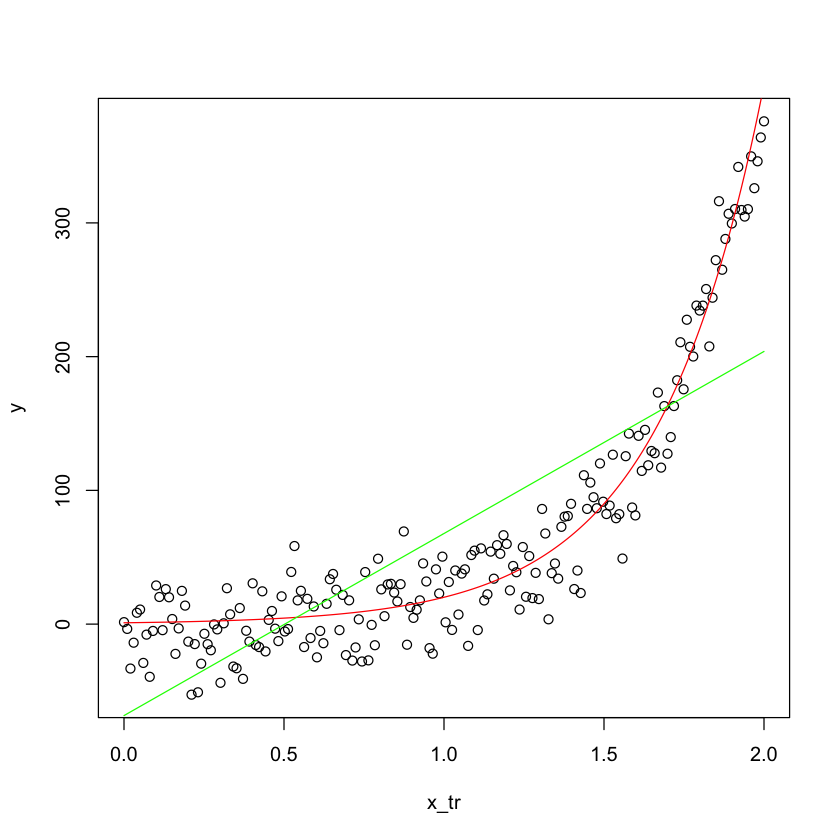

In [7]:
plot(x_tr,y)
points(x_tr, y_tr, type="l", col="red")
points(x_tr, yhat,type="l",col="green")

# Binary regression
Now lets make a binary response variable. In most supervised learning problems targets prediction of a categorical variable. You can look at binary data as a continuous data, but observed after threshold.

Lets threshold our continuous data "y" at point 90. In Machine learning classes are defined using -1 and 1. 






In [8]:
z=(1*(y>90)-0.5)*2

In [9]:
z

[1] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 [26] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 [51] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 [76] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
[101] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
[126] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1  1
[151] -1 -1  1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
[176]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

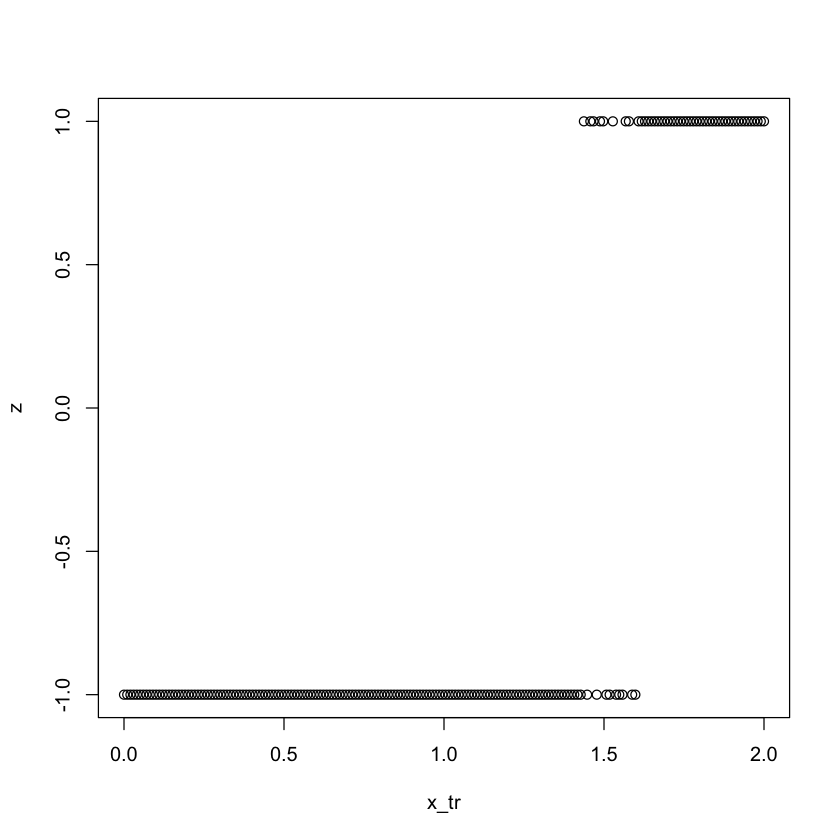

In [10]:
plot(x_tr, z)

# Exercise
Fit a linear regression on z as the response (and x_tr as the feature) and see how well you predict your data.

In [11]:
traindata <- as.data.frame(cbind(z, x_tr))
colnames(traindata) <- c("z", "x")
#traindata
zhat <- predict(lm(z~x, data=traindata))

In [12]:
zclass <- 2*(zhat>0)-1

In [13]:
mean(zclass==z)

[1] 0.95

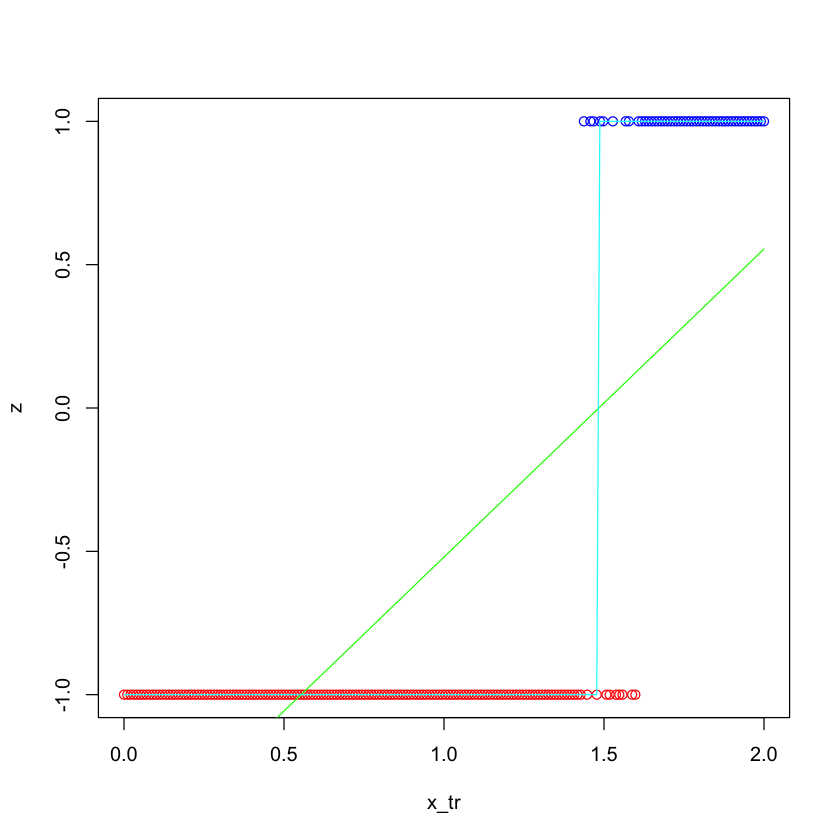

In [14]:
plot(x_tr,z, col= z+3)
points(x_tr, zhat, type="l", col="green")
points(x_tr, zclass, type="l", col="cyan")

In [19]:
require(MASS)
n <- 50
X1 <- mvrnorm(n, mu=c(1,1), Sigma=diag(c(1,1)))
X2 <- mvrnorm(n, mu=c(-1,-1), Sigma=diag(c(1,1)))
X <- rbind(X1,X2)
z <- rep(c(-1,1), each=n)            

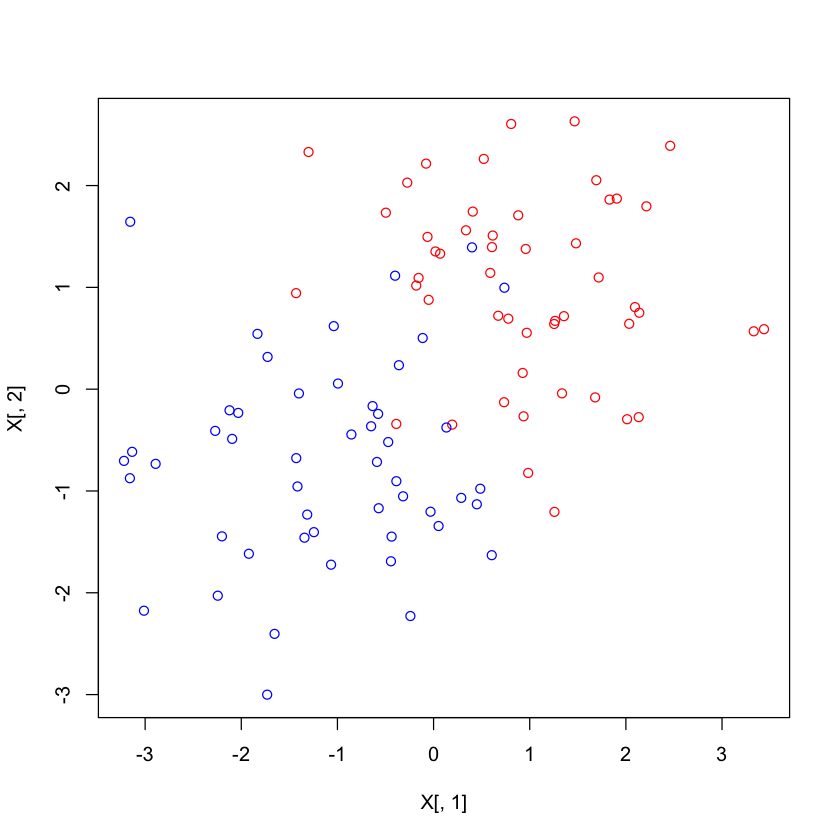

In [16]:
plot(X[,1], X[,2],col=z+3)

In [17]:
traindata <- as.data.frame(cbind(z, X))
colnames(traindata) <- c("z", "x1", "x2")
lm.obj <- lm( z~x1+x2, data=traindata)
zhat <- predict(lm.obj)

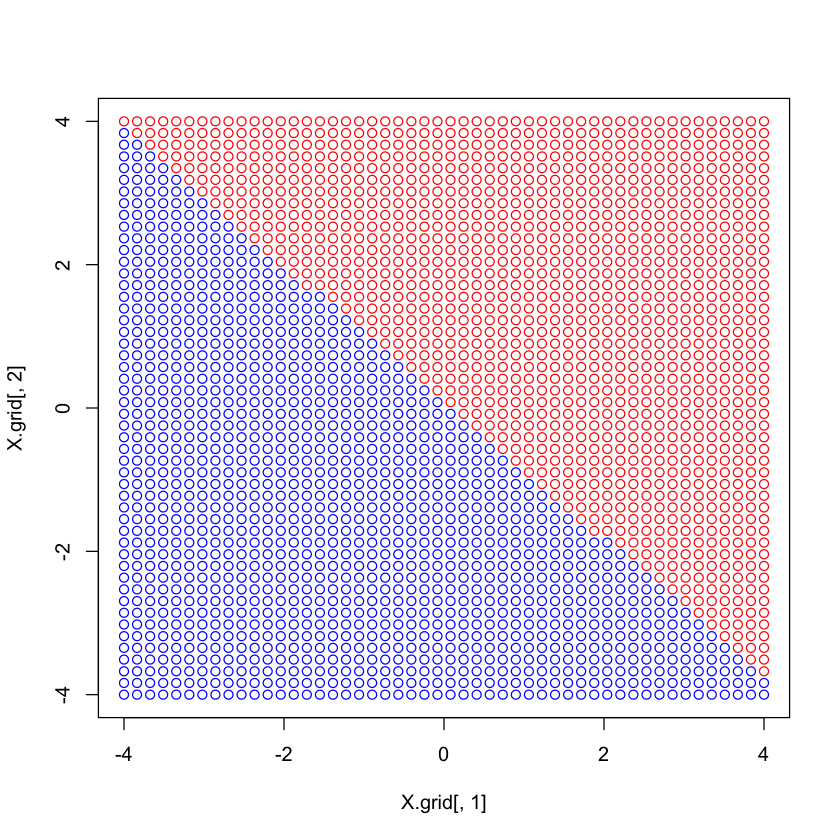

In [18]:
n <- 50
X.grid <- expand.grid(seq(-4, 4, length=n), seq(-4, 4, length=n))
testdata <- as.data.frame (cbind(z, X.grid)) 
colnames(testdata) <- c("z", "x1", "x2")
zhat.grid <- predict(lm.obj, newdata=testdata)
z.gridclass <- 2*(zhat.grid>0)-1
plot(X.grid[,1], X.grid[,2], col=z.gridclass+3)